# Importações

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [2]:
df = pd.read_csv('../df_teste_5000.csv', delimiter=';')
print(f"Número de variáveis de x: {len(df.columns) - 1}")
print(f"\nVariáveis de x : {df.loc[:, df.columns != 'vencido_acima_de_15_dias_refatorada'].columns}\n")
df.head()

Número de variáveis de x: 21

Variáveis de x : Index(['MONTH', 'INDICE_CONDICOES_ECONOMICAS_ATUAIS', 'IPCA_INDICE_GERAL',
       'IPCA_TAXA_VARIACAO', 'PIB', 'TAXAS_DESEMPREGO', 'uf', 'tcb', 'sr',
       'cliente', 'ocupacao', 'cnae_secao', 'cnae_subclasse', 'porte',
       'modalidade', 'origem', 'indexador', 'numero_de_operacoes',
       'carteira_ativa', 'carteira_inadimplida_arrastada',
       'ativo_problematico'],
      dtype='object')



,MONTH,INDICE_CONDICOES_ECONOMICAS_ATUAIS,IPCA_INDICE_GERAL,IPCA_TAXA_VARIACAO,PIB,TAXAS_DESEMPREGO,uf,tcb,sr,cliente,...,cnae_subclasse,porte,modalidade,origem,indexador,numero_de_operacoes,vencido_acima_de_15_dias_refatorada,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico
0,1,105.78,5331.42,0.21,617747.2,3.2,AC,Bancário,S1,PF,...,-,PF - Mais de 1 a 2 salários mínimos,PF - Outros créditos,Com destinação específica,Prefixado,8,Adimplente,1063.22,0.00,0.00
1,1,105.78,5331.42,0.21,617747.2,3.2,AC,Bancário,S1,PJ,...,PJ - Comércio varejista de produtos alimentíci...,PJ - Médio,PJ - Capital de giro rotativo,Sem destinação específica,Prefixado,8,Inadimplente,82277.18,0.00,0.00
2,1,105.78,5331.42,0.21,617747.2,3.2,AC,Não bancário,S4,PF,...,-,PF - Acima de 20 salários mínimos,PF - Cartão de crédito,Sem destinação específica,Prefixado,95,Inadimplente,87590.65,2966.47,2966.47
3,1,105.78,5331.42,0.21,617747.2,3.2,AL,Bancário,S1,PJ,...,PJ - Atividades de rádio,PJ - Pequeno,PJ - Financiamento de infraestrutura/desenvolv...,Com destinação específica,Pós-fixado,8,Adimplente,30602.94,0.00,0.00
4,1,105.78,5331.42,0.21,617747.2,3.2,AL,Bancário,S2,PJ,...,PJ - Comércio varejista de medicamentos veteri...,PJ - Médio,PJ - Operações com recebíveis,Sem destinação específica,Prefixado,8,Adimplente,127421.30,0.00,0.00


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5006 entries, 0 to 5005
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MONTH                                5006 non-null   int64  
 1   INDICE_CONDICOES_ECONOMICAS_ATUAIS   5006 non-null   float64
 2   IPCA_INDICE_GERAL                    5006 non-null   float64
 3   IPCA_TAXA_VARIACAO                   5006 non-null   float64
 4   PIB                                  5006 non-null   float64
 5   TAXAS_DESEMPREGO                     5006 non-null   float64
 6   uf                                   5006 non-null   object 
 7   tcb                                  5006 non-null   object 
 8   sr                                   4988 non-null   object 
 9   cliente                              5006 non-null   object 
 10  ocupacao                             5006 non-null   object 
 11  cnae_secao                    

## Criação de variáveis auxiliares

In [3]:
col_variaveis = df.columns[:-1]
variaveis_numericas = df[col_variaveis].select_dtypes(include=np.number).columns
variaveis_categoricas = df[col_variaveis].select_dtypes(exclude=np.number).columns
col_y = df.columns[-1]

## Verificação de valores nulos

<AxesSubplot:>

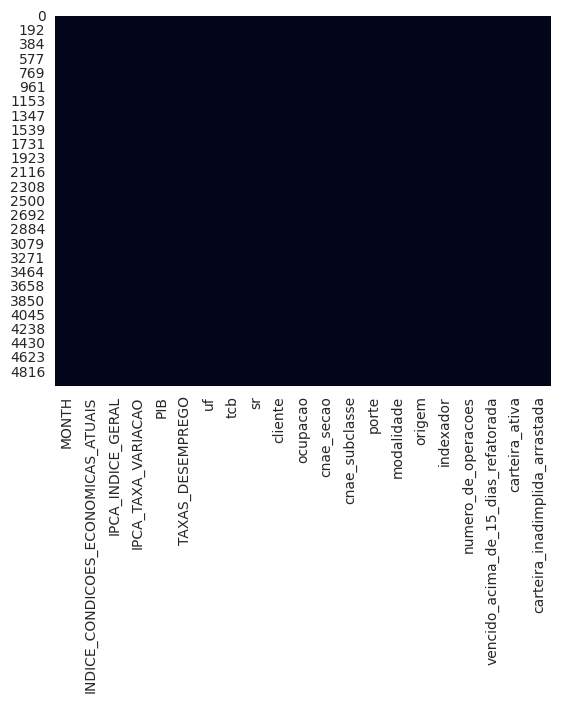

In [191]:
sns.heatmap(df[col_variaveis].isnull(), cbar=False)

Há poucas observações, cerca de 15, apenas na variável **sr**

## Plotagem de gráficos de distribuição de observações em relação ao vencimento ou não de crédito

In [ ]:
plt.figure(figsize=(21,10))
sns.countplot(data=df, x='vencido_acima_de_15_dias_refatorada', hue=col_variaveis[0])

<AxesSubplot:xlabel='vencido_acima_de_15_dias_refatorada', ylabel='count'>

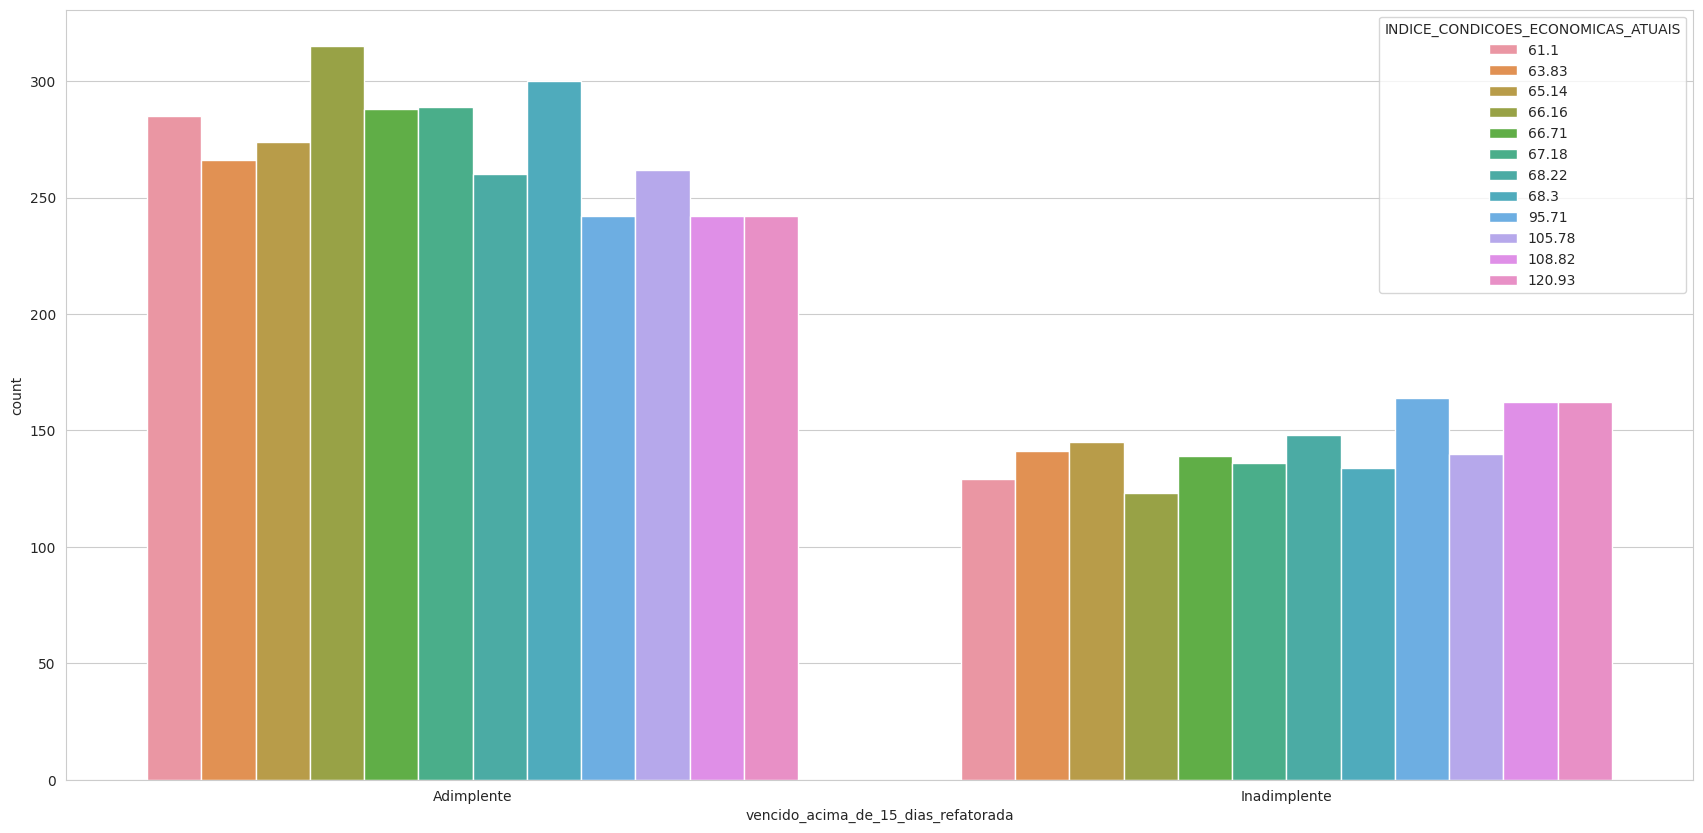

In [193]:
plt.figure(figsize=(21,10))
sns.countplot(data=df, x='vencido_acima_de_15_dias_refatorada', hue=col_variaveis[1])

<AxesSubplot:xlabel='vencido_acima_de_15_dias_refatorada', ylabel='count'>

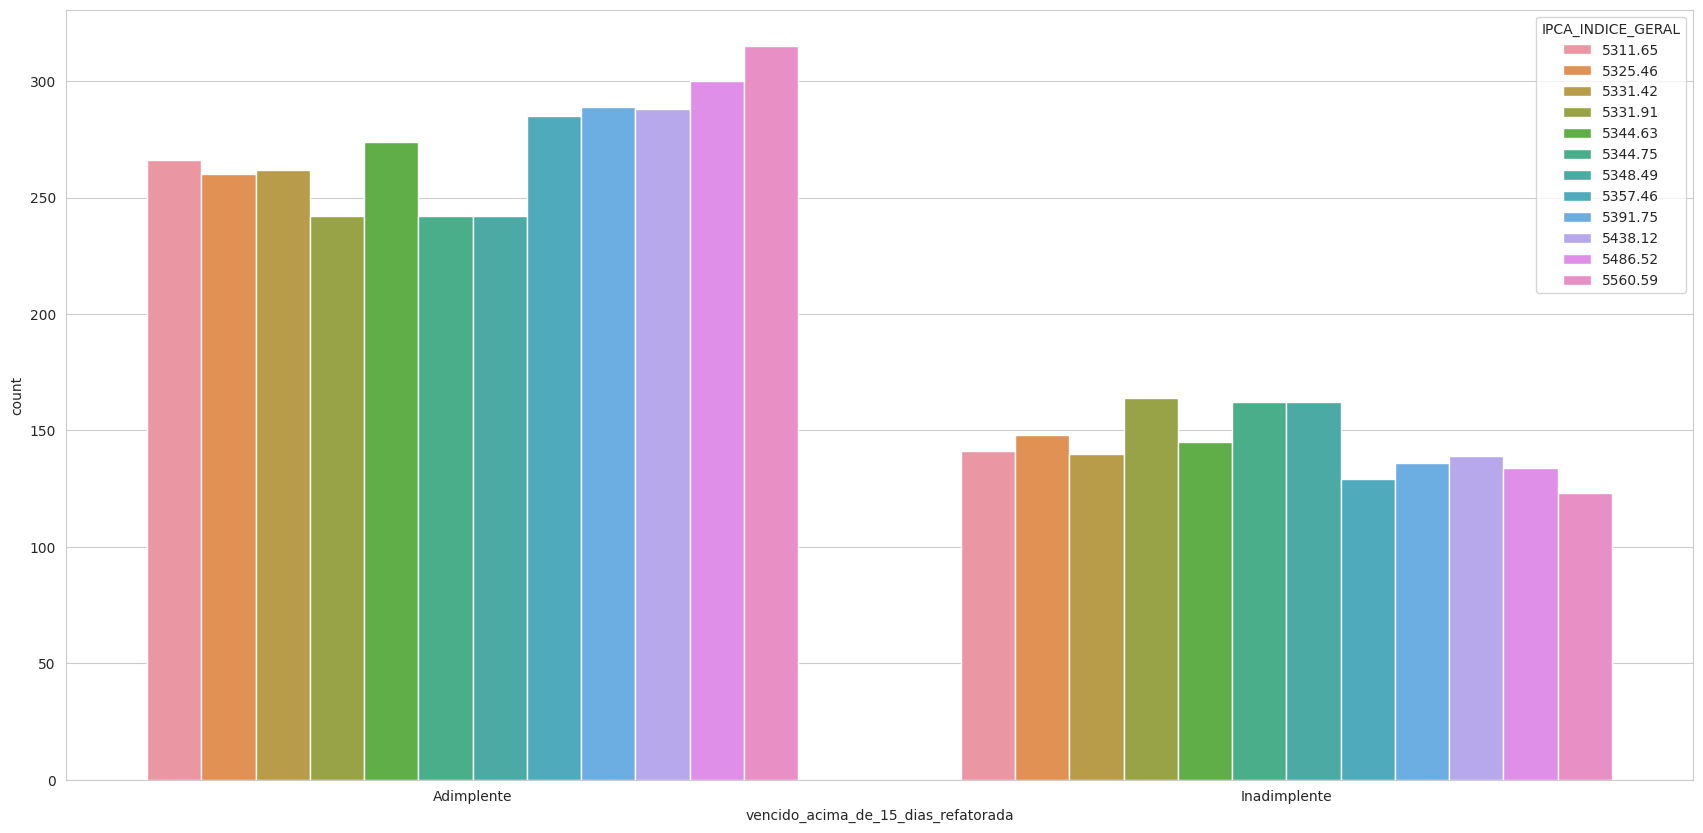

In [194]:
plt.figure(figsize=(21,10))
sns.countplot(data=df, x='vencido_acima_de_15_dias_refatorada', hue=col_variaveis[2])

<AxesSubplot:xlabel='vencido_acima_de_15_dias_refatorada', ylabel='count'>

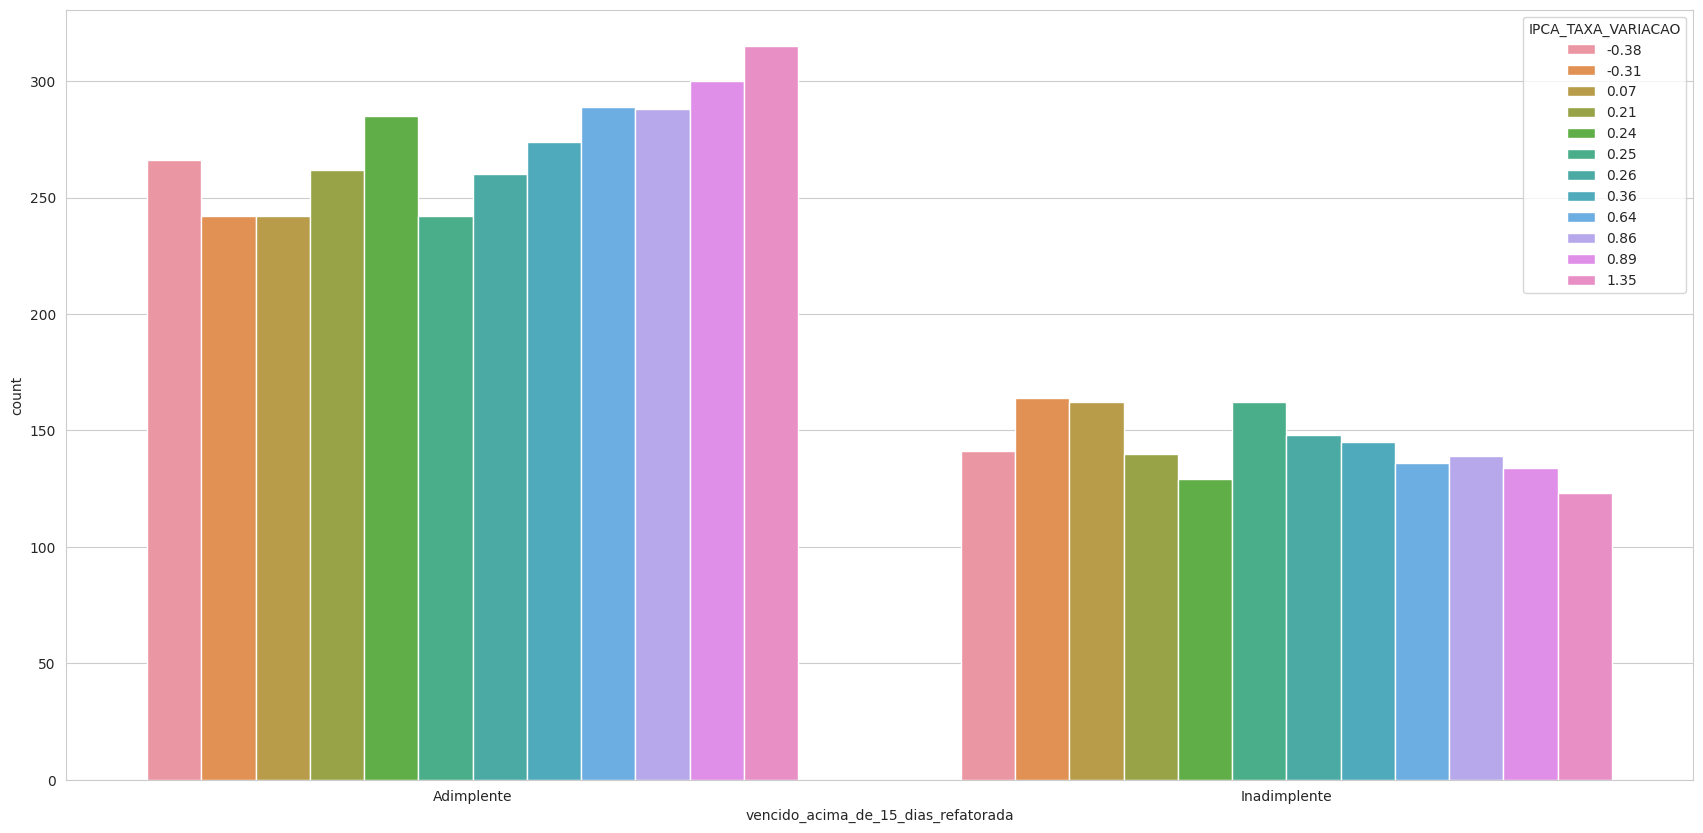

In [195]:
plt.figure(figsize=(21,10))
sns.countplot(data=df, x='vencido_acima_de_15_dias_refatorada', hue=col_variaveis[3])

In [ ]:
plt.figure(figsize=(21,10))
sns.countplot(data=df, x='vencido_acima_de_15_dias_refatorada', hue=col_variaveis[4])

In [ ]:
plt.figure(figsize=(21,10))
sns.countplot(data=df, x='vencido_acima_de_15_dias_refatorada', hue=col_variaveis[5])

In [ ]:
plt.figure(figsize=(21,10))
sns.countplot(data=df, x='vencido_acima_de_15_dias_refatorada', hue=col_variaveis[6])

In [ ]:
plt.figure(figsize=(21,10))
sns.countplot(data=df, x='vencido_acima_de_15_dias_refatorada', hue=col_variaveis[7])

In [ ]:
plt.figure(figsize=(21,10))
sns.countplot(data=df, x='vencido_acima_de_15_dias_refatorada', hue=col_variaveis[8])

In [ ]:
plt.figure(figsize=(21,10))
sns.countplot(data=df, x='vencido_acima_de_15_dias_refatorada', hue=col_variaveis[9])

In [ ]:
plt.figure(figsize=(21,10))
sns.countplot(data=df, x='vencido_acima_de_15_dias_refatorada', hue=col_variaveis[10])

In [ ]:
plt.figure(figsize=(21,10))
sns.countplot(data=df, x='vencido_acima_de_15_dias_refatorada', hue=col_variaveis[11])

## Executar as células abaixo pode impactar severamente o desempenho da máquina.
 - O resultado é uniforme para todas as categorias cnae_subclasse
 - Nenhuma categoria de qualquer variável impacta, isoladamente e significamentivamente, a variável **vencido_acima_de_15_dias**

In [ ]:
plt.figure(figsize=(21,10))
sns.countplot(data=df, x='vencido_acima_de_15_dias_refatorada', hue=col_variaveis[12])

In [ ]:
plt.figure(figsize=(21,10))
sns.countplot(data=df, x='vencido_acima_de_15_dias_refatorada', hue=col_variaveis[13])

In [ ]:
plt.figure(figsize=(21,10))
sns.countplot(data=df, x='vencido_acima_de_15_dias_refatorada', hue=col_variaveis[14])

In [ ]:
plt.figure(figsize=(21,10))
sns.countplot(data=df, x='vencido_acima_de_15_dias_refatorada', hue=col_variaveis[15])

In [ ]:
plt.figure(figsize=(21,10))
sns.countplot(data=df, x='vencido_acima_de_15_dias_refatorada', hue=col_variaveis[16])

In [ ]:
plt.figure(figsize=(21,10))
sns.countplot(data=df, x='vencido_acima_de_15_dias_refatorada', hue=col_variaveis[17])

In [ ]:
plt.figure(figsize=(21,10))
sns.countplot(data=df, x='vencido_acima_de_15_dias_refatorada', hue=col_variaveis[18])

In [ ]:
plt.figure(figsize=(21,10))
sns.countplot(data=df, x='vencido_acima_de_15_dias_refatorada', hue=col_variaveis[19])

In [ ]:
plt.figure(figsize=(21,10))
sns.countplot(data=df, x='vencido_acima_de_15_dias_refatorada', hue=col_variaveis[20])

In [ ]:
col_variaveis[18]

In [4]:
df.dropna(inplace=True)
x_data, y_data = df.loc[:, df.columns != 'vencido_acima_de_15_dias_refatorada'], df.loc[:, df.columns == 'vencido_acima_de_15_dias_refatorada']
print(f'Variáveis X, anterior a dummizacao: {x_data.columns}\nVariáveis Y: {y_data.columns}')
print(f"Total de variáveis X: {len(x_data.columns)}")

Variáveis X, anterior a dummizacao: Index(['MONTH', 'INDICE_CONDICOES_ECONOMICAS_ATUAIS', 'IPCA_INDICE_GERAL',
       'IPCA_TAXA_VARIACAO', 'PIB', 'TAXAS_DESEMPREGO', 'uf', 'tcb', 'sr',
       'cliente', 'ocupacao', 'cnae_secao', 'cnae_subclasse', 'porte',
       'modalidade', 'origem', 'indexador', 'numero_de_operacoes',
       'carteira_ativa', 'carteira_inadimplida_arrastada',
       'ativo_problematico'],
      dtype='object')
Variáveis Y: Index(['vencido_acima_de_15_dias_refatorada'], dtype='object')
Total de variáveis X: 21


In [5]:
x_data_dummy = pd.get_dummies(data=x_data, drop_first=True)
x_data_dummy.head()
print(f'Variáveis X, após a dummização: {x_data_dummy.columns}\n')
print(f"Total de variáveis X: {len(x_data_dummy.columns)}")

Variáveis X, após a dummização: Index(['MONTH', 'INDICE_CONDICOES_ECONOMICAS_ATUAIS', 'IPCA_INDICE_GERAL',
       'IPCA_TAXA_VARIACAO', 'PIB', 'TAXAS_DESEMPREGO', 'numero_de_operacoes',
       'carteira_ativa', 'carteira_inadimplida_arrastada',
       'ativo_problematico',
       ...
       'modalidade_PJ - Investimento',
       'modalidade_PJ - Operações com recebíveis',
       'modalidade_PJ - Outros créditos',
       'modalidade_PJ - Rural e agroindustrial',
       'origem_Sem destinação específica', 'indexador_Outros indexadores',
       'indexador_Prefixado', 'indexador_Pós-fixado', 'indexador_TCR/TRFC',
       'indexador_Índices de preços'],
      dtype='object', length=941)

Total de variáveis X: 941


In [6]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_data_dummy, y_data, test_size=.3, random_state=2)
print(f"Totais de observações: {len(x_treino) + len(x_teste)}\nx_treino: {len(x_treino)}\ny_treino: {len(y_treino)}\nx_teste: {len(x_teste)}\ny_teste: {len(y_teste)}")

Totais de observações: 4988
x_treino: 3491
y_treino: 3491
x_teste: 1497
y_teste: 1497


## Iniciando o treinamento do modelo logístico simples

In [7]:
modelo_simples = LogisticRegression(multi_class='ovr')
modelo_simples.fit(x_treino, y_treino.values.ravel())

LogisticRegression(multi_class='ovr')

In [8]:
y_predicoes, y_prob_pred = modelo_simples.predict(x_teste), modelo_simples.predict_proba(x_teste)[:, 1]

In [14]:
y_teste

,vencido_acima_de_15_dias_refatorada
4118,Adimplente
3974,Inadimplente
2220,Adimplente
3355,Adimplente
2409,Adimplente
...,...
828,Inadimplente
3170,Adimplente
2352,Adimplente
4038,Adimplente


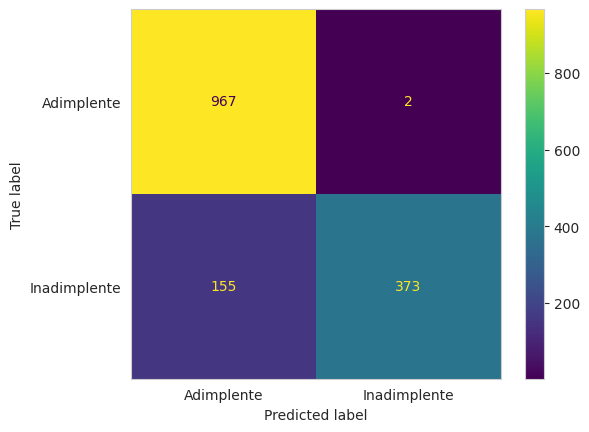

In [161]:
confusionmatrix = confusion_matrix(y_teste, y_predicoes, labels=modelo_simples.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, display_labels=modelo_simples.classes_)
display.plot()
plt.grid(False)
plt.show()

In [162]:
classificacoes = classification_report(y_teste, y_predicoes, output_dict=True)
print(classification_report(y_teste, y_predicoes))
print(f'Acurácia: {classificacoes["accuracy"]*100:>11.2f}%\nSensitividade: {classificacoes["Inadimplente"]["recall"]*100:6.2f}%\nEspecificidade: {classificacoes["Adimplente"]["recall"]*100:.2f}%')

              precision    recall  f1-score   support

  Adimplente       0.86      1.00      0.92       969
Inadimplente       0.99      0.71      0.83       528

    accuracy                           0.90      1497
   macro avg       0.93      0.85      0.88      1497
weighted avg       0.91      0.90      0.89      1497

Acurácia:       89.51%
Sensitividade:  70.64%
Especificidade: 99.79%


In [176]:
print(y_prob_pred)

[0.12114209 1.         0.14570102 ... 0.14570117 0.11916739 0.1303879 ]


In [188]:
fpr, tpr, thresholds = roc_curve(y_teste, y_prob_pred, pos_label='Inadimplente')

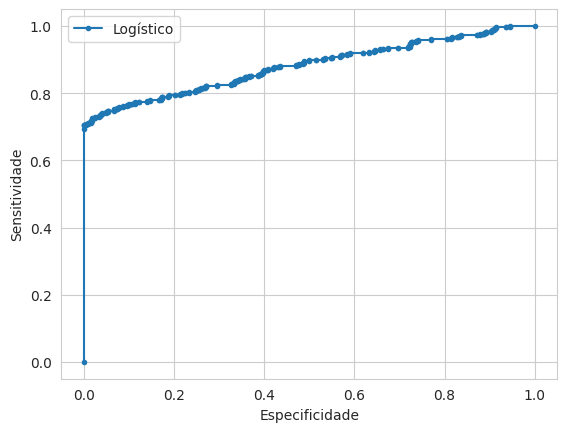

In [190]:
plt.plot(fpr, tpr, marker='.', label='Logístico')
plt.xlabel('Especificidade')
plt.ylabel('Sensitividade')
plt.legend()
plt.show()

## Pontos a fazer
- realizar curva de cutoffs
- realizar curva ROC
- realizar stepwise e avaliar impacto das variáveis nas predições
## Avaliar
- necessidade de padronização das variáveis numéricas